# Prediksi dan Deteksi Anomali Konsumsi Listrik Rumah Tangga

Root Mean Squared Error (RMSE): 0.9000000000000004


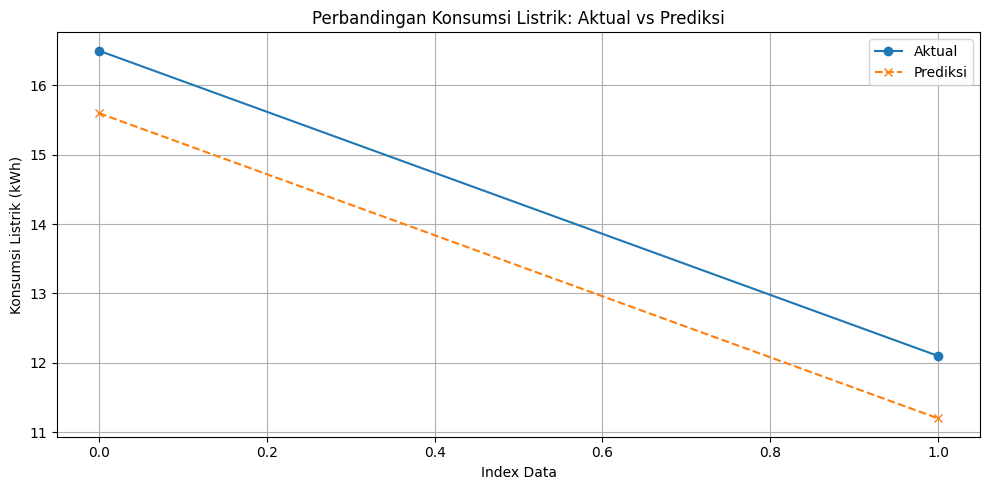

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Contoh data dummy (bisa diganti dengan dataset asli)
data = {
    'day_usage_kwh': [4.5, 12.1, 7.3, 15.6, 6.2, 20.3, 3.1, 8.4, 16.5, 11.2],
    'peak_hour_usage': [1.2, 5.5, 2.1, 7.3, 2.5, 10.1, 0.5, 3.2, 8.5, 4.3],
    'num_devices_on': [3, 8, 4, 10, 5, 12, 2, 6, 11, 7]
}
df = pd.DataFrame(data)

# Fitur & Target
X = df[['peak_hour_usage', 'num_devices_on']]
y = df['day_usage_kwh']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Decision Tree Regressor
reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = reg_model.predict(X_test_scaled)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Aktual', marker='o')
plt.plot(y_pred, label='Prediksi', linestyle='--', marker='x')
plt.title("Perbandingan Konsumsi Listrik: Aktual vs Prediksi")
plt.xlabel("Index Data")
plt.ylabel("Konsumsi Listrik (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simulasi Dataset Penggunaan Listrik Sehari-hari (Sintetik)

In [9]:

# Dataset buatan: penggunaan listrik per hari selama 60 hari
np.random.seed(42)
days = pd.date_range(start="2024-01-01", periods=60, freq='D')
daily_usage = np.random.normal(loc=15, scale=5, size=60).clip(min=5)  # kWh
peak_usage = daily_usage * np.random.uniform(0.2, 0.6, size=60)
num_devices = np.random.randint(3, 15, size=60)

# Simulasi anomali (misalnya korsleting listrik)
is_short_circuit = [1 if i in [10, 35, 48] else 0 for i in range(60)]  # hanya beberapa hari

df = pd.DataFrame({
    'date': days,
    'day_usage_kwh': daily_usage,
    'peak_hour_usage': peak_usage,
    'num_devices_on': num_devices,
    'is_short_circuit': is_short_circuit
})
df.set_index('date', inplace=True)
df.head()


,day_usage_kwh,peak_hour_usage,num_devices_on,is_short_circuit
date,,,,
2024-01-01,17.483571,5.810826,4,0
2024-01-02,14.308678,3.225510,5,0
2024-01-03,18.238443,5.916422,3,0
2024-01-04,22.615149,7.464658,7,0
2024-01-05,13.829233,6.801804,3,0


## Visualisasi Awal Penggunaan Listrik

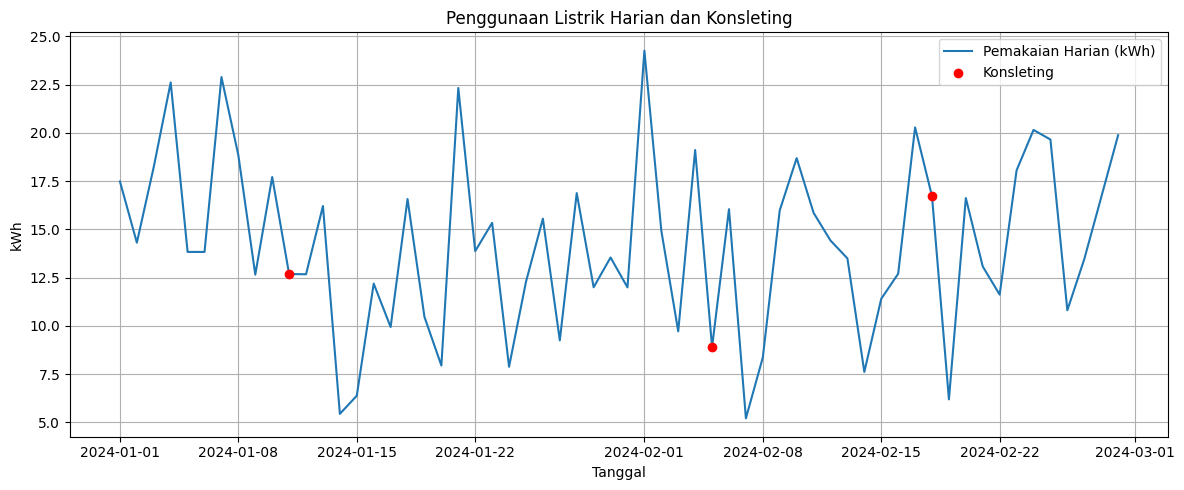

In [10]:

plt.figure(figsize=(12,5))
plt.plot(df.index, df['day_usage_kwh'], label='Pemakaian Harian (kWh)')
plt.scatter(df[df['is_short_circuit']==1].index, df[df['is_short_circuit']==1]['day_usage_kwh'], color='red', label='Konsleting', zorder=5)
plt.title("Penggunaan Listrik Harian dan Konsleting")
plt.xlabel("Tanggal")
plt.ylabel("kWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Prediksi Konsumsi Listrik (Regresi)

Root Mean Squared Error: 0.9000000000000004


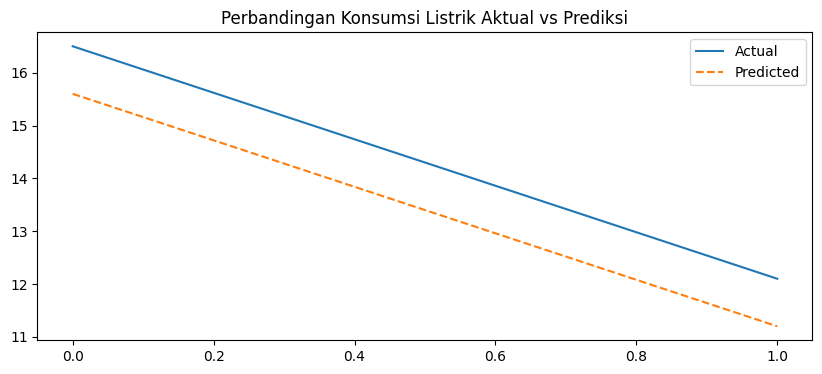

In [11]:

from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor untuk prediksi konsumsi listrik
reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(X_train_scaled, y_train)

y_pred = reg_model.predict(X_test_scaled)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title("Perbandingan Konsumsi Listrik Aktual vs Prediksi")
plt.legend()
plt.show()


## Deteksi Anomali Penggunaan Listrik

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Fitur untuk deteksi anomali
features = df[['day_usage_kwh', 'peak_hour_usage', 'num_devices_on']]

# Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Model Isolation Forest
anomaly_model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = anomaly_model.fit_predict(features_scaled)

# Konversi hasil: -1 = anomali, 1 = normal → ubah ke 1 = anomali, 0 = normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Tampilkan data dengan status anomali
print(df)


            day_usage_kwh  peak_hour_usage  num_devices_on  is_short_circuit  \
date                                                                           
2024-01-01      17.483571         5.810826               4                 0   
2024-01-02      14.308678         3.225510               5                 0   
2024-01-03      18.238443         5.916422               3                 0   
2024-01-04      22.615149         7.464658               7                 0   
2024-01-05      13.829233         6.801804               3                 0   
2024-01-06      13.829315         6.292656              10                 0   
2024-01-07      22.896064        12.704685               3                 0   
2024-01-08      18.837174         7.325513              13                 0   
2024-01-09      12.652628         3.135798               3                 0   
2024-01-10      17.712800         8.595985               4                 0   
2024-01-11      12.682912         6.3961

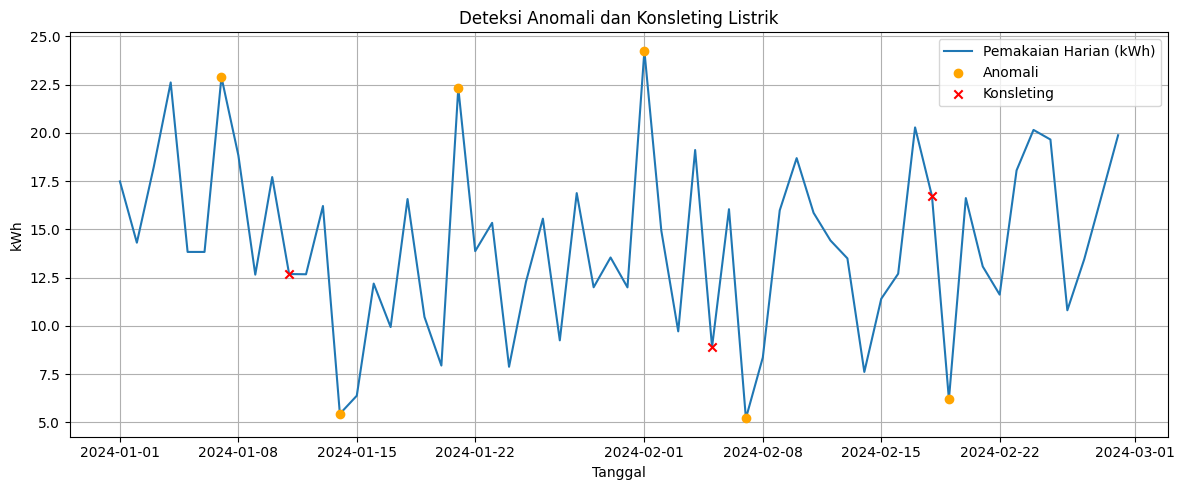

In [14]:

plt.figure(figsize=(12,5))
plt.plot(df.index, df['day_usage_kwh'], label='Pemakaian Harian (kWh)')
plt.scatter(df[df['anomaly']==1].index, df[df['anomaly']==1]['day_usage_kwh'], color='orange', label='Anomali', zorder=5)
plt.scatter(df[df['is_short_circuit']==1].index, df[df['is_short_circuit']==1]['day_usage_kwh'], color='red', label='Konsleting', marker='x', zorder=5)
plt.title("Deteksi Anomali dan Konsleting Listrik")
plt.xlabel("Tanggal")
plt.ylabel("kWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Klasifikasi Konsleting Menggunakan KNN

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Data contoh
data = {
    'day_usage_kwh': [4.5, 12.1, 7.3, 15.6, 6.2, 20.3, 3.1, 8.4, 16.5, 11.2],
    'peak_hour_usage': [1.2, 5.5, 2.1, 7.3, 2.5, 10.1, 0.5, 3.2, 8.5, 4.3],
    'num_devices_on': [3, 8, 4, 10, 5, 12, 2, 6, 11, 7],
    'is_short_circuit': [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Fitur dan label untuk klasifikasi konsleting
X_class = df[['day_usage_kwh', 'peak_hour_usage', 'num_devices_on']]
y_class = df['is_short_circuit']

# Split data latih dan uji
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

# Model klasifikasi Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(Xc_train_scaled, yc_train)

# Prediksi
yc_pred = dt_model.predict(Xc_test_scaled)

# Evaluasi
print("Akurasi Decision Tree:", accuracy_score(yc_test, yc_pred))
print("Laporan Klasifikasi:\n", classification_report(yc_test, yc_pred))


Akurasi Decision Tree: 1.0
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

